# Diabetes prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline


In [11]:
df_data=pd.read_csv("diabetes.csv")

In [12]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
df_data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [18]:
df_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df_copy=df_data.copy(deep=True)
df_copy[['Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI']]=df_copy[['Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI']].replace(0,np.NaN)                     


print(df_copy.isnull().sum())
              
                     


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Data visualization

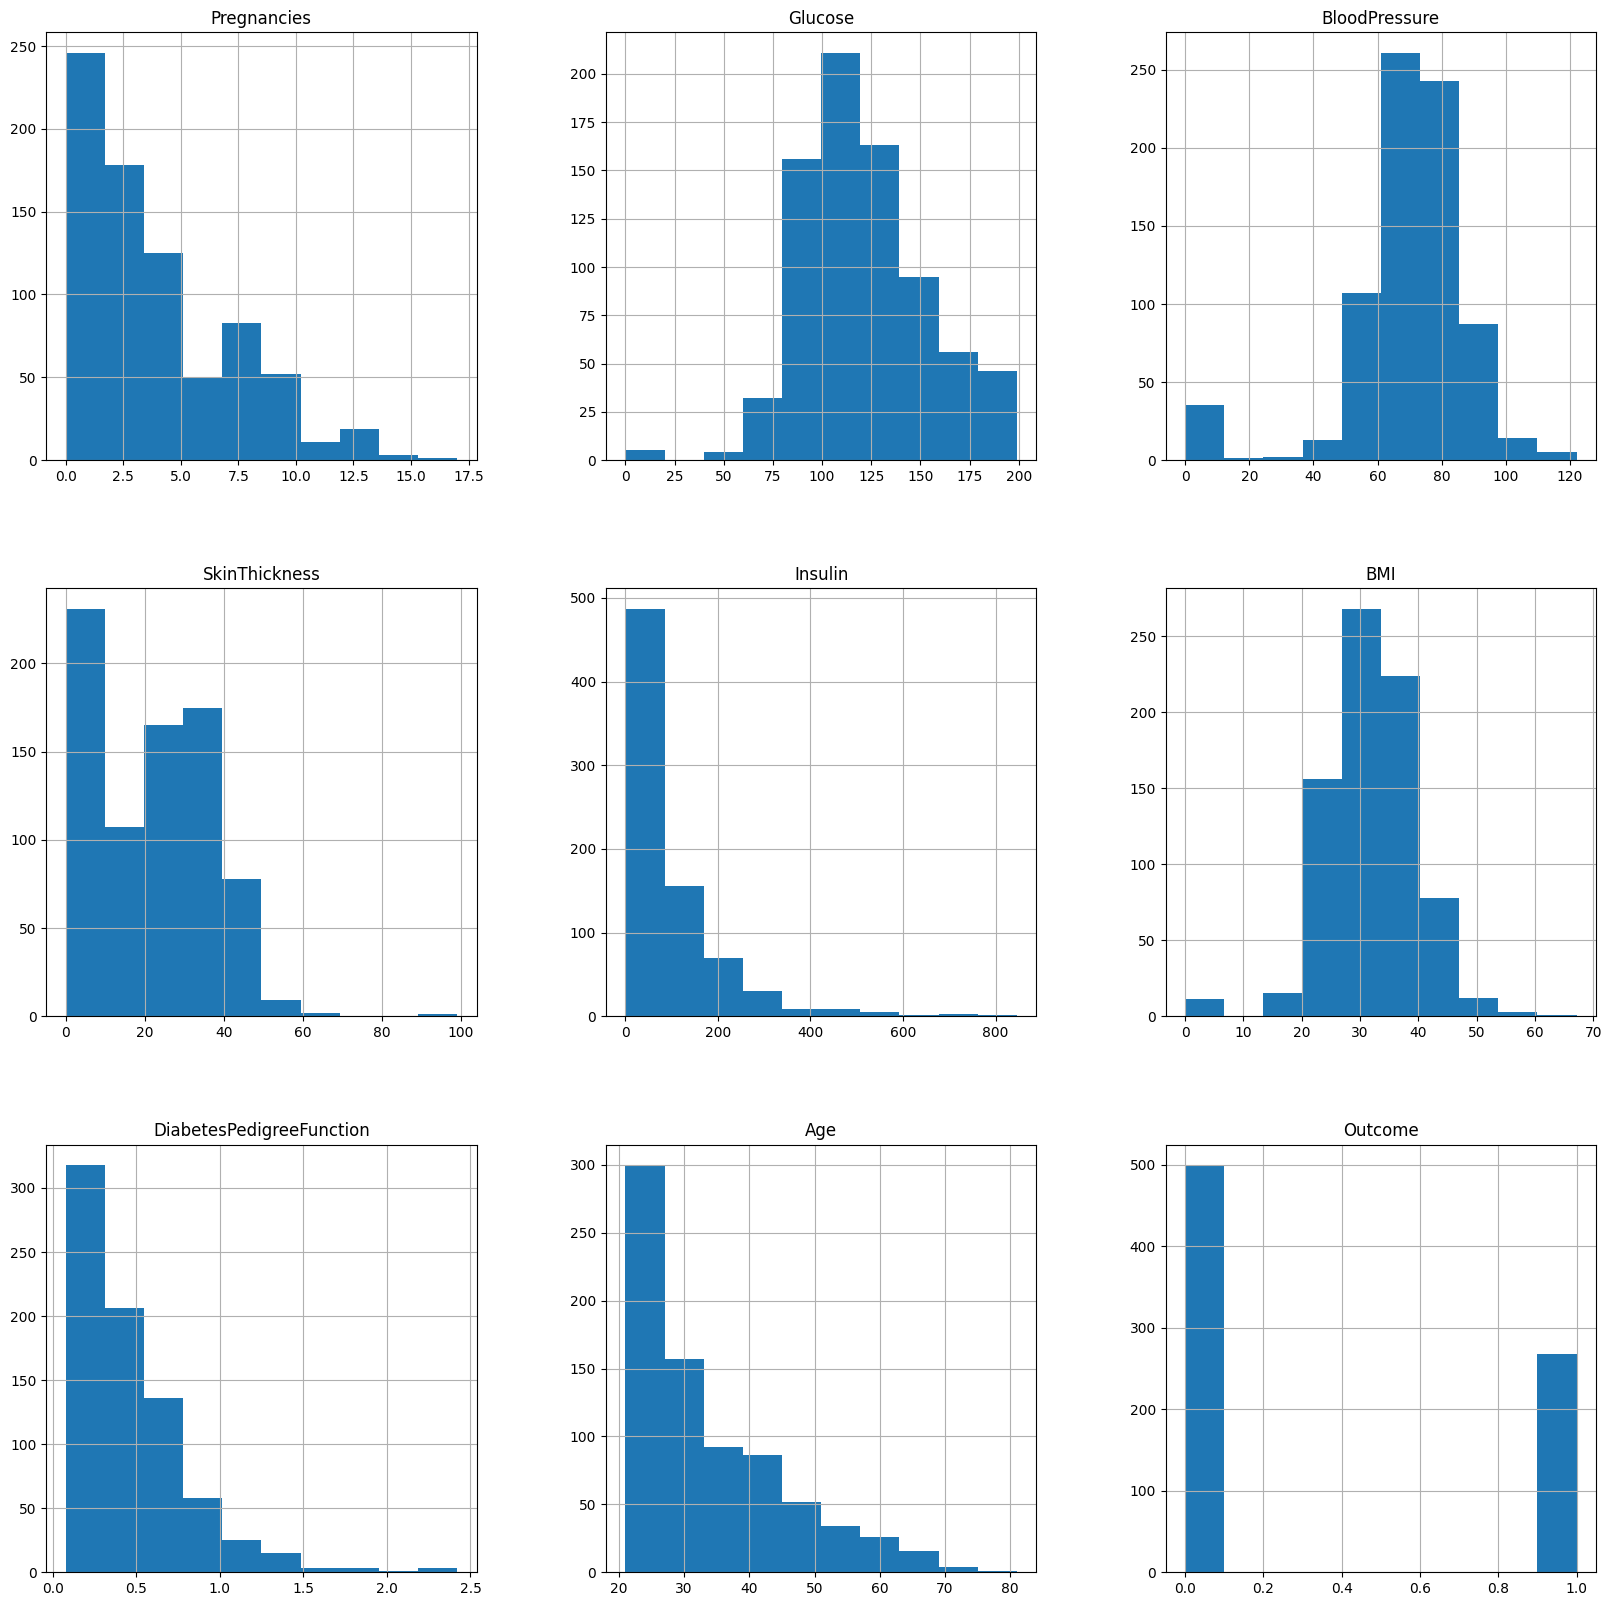

In [20]:
p=df_data.hist(figsize=(20,20))

In [21]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

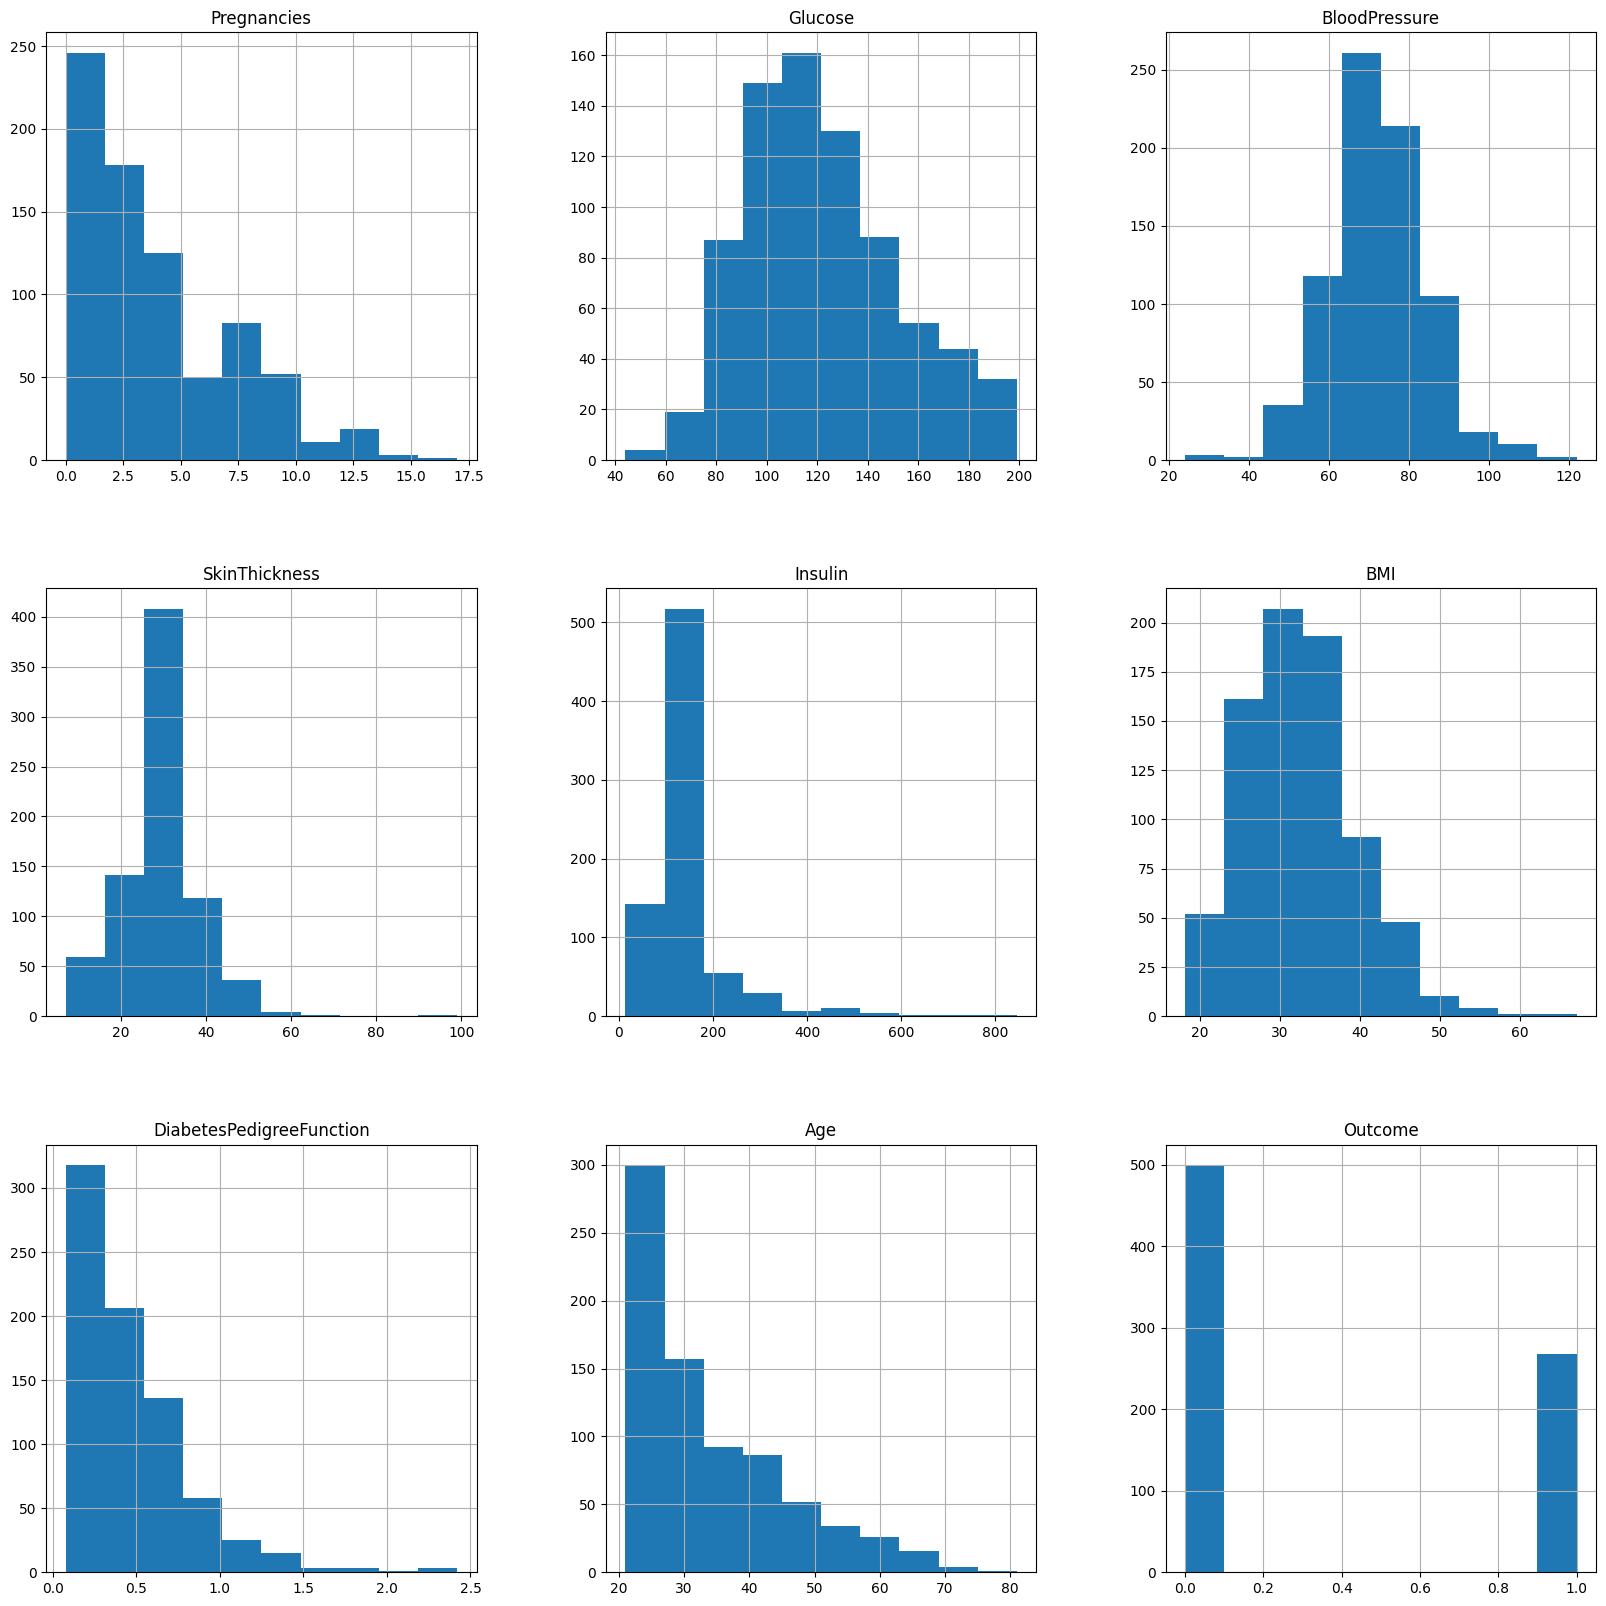

In [22]:
p=df_copy.hist(figsize=(20,20))

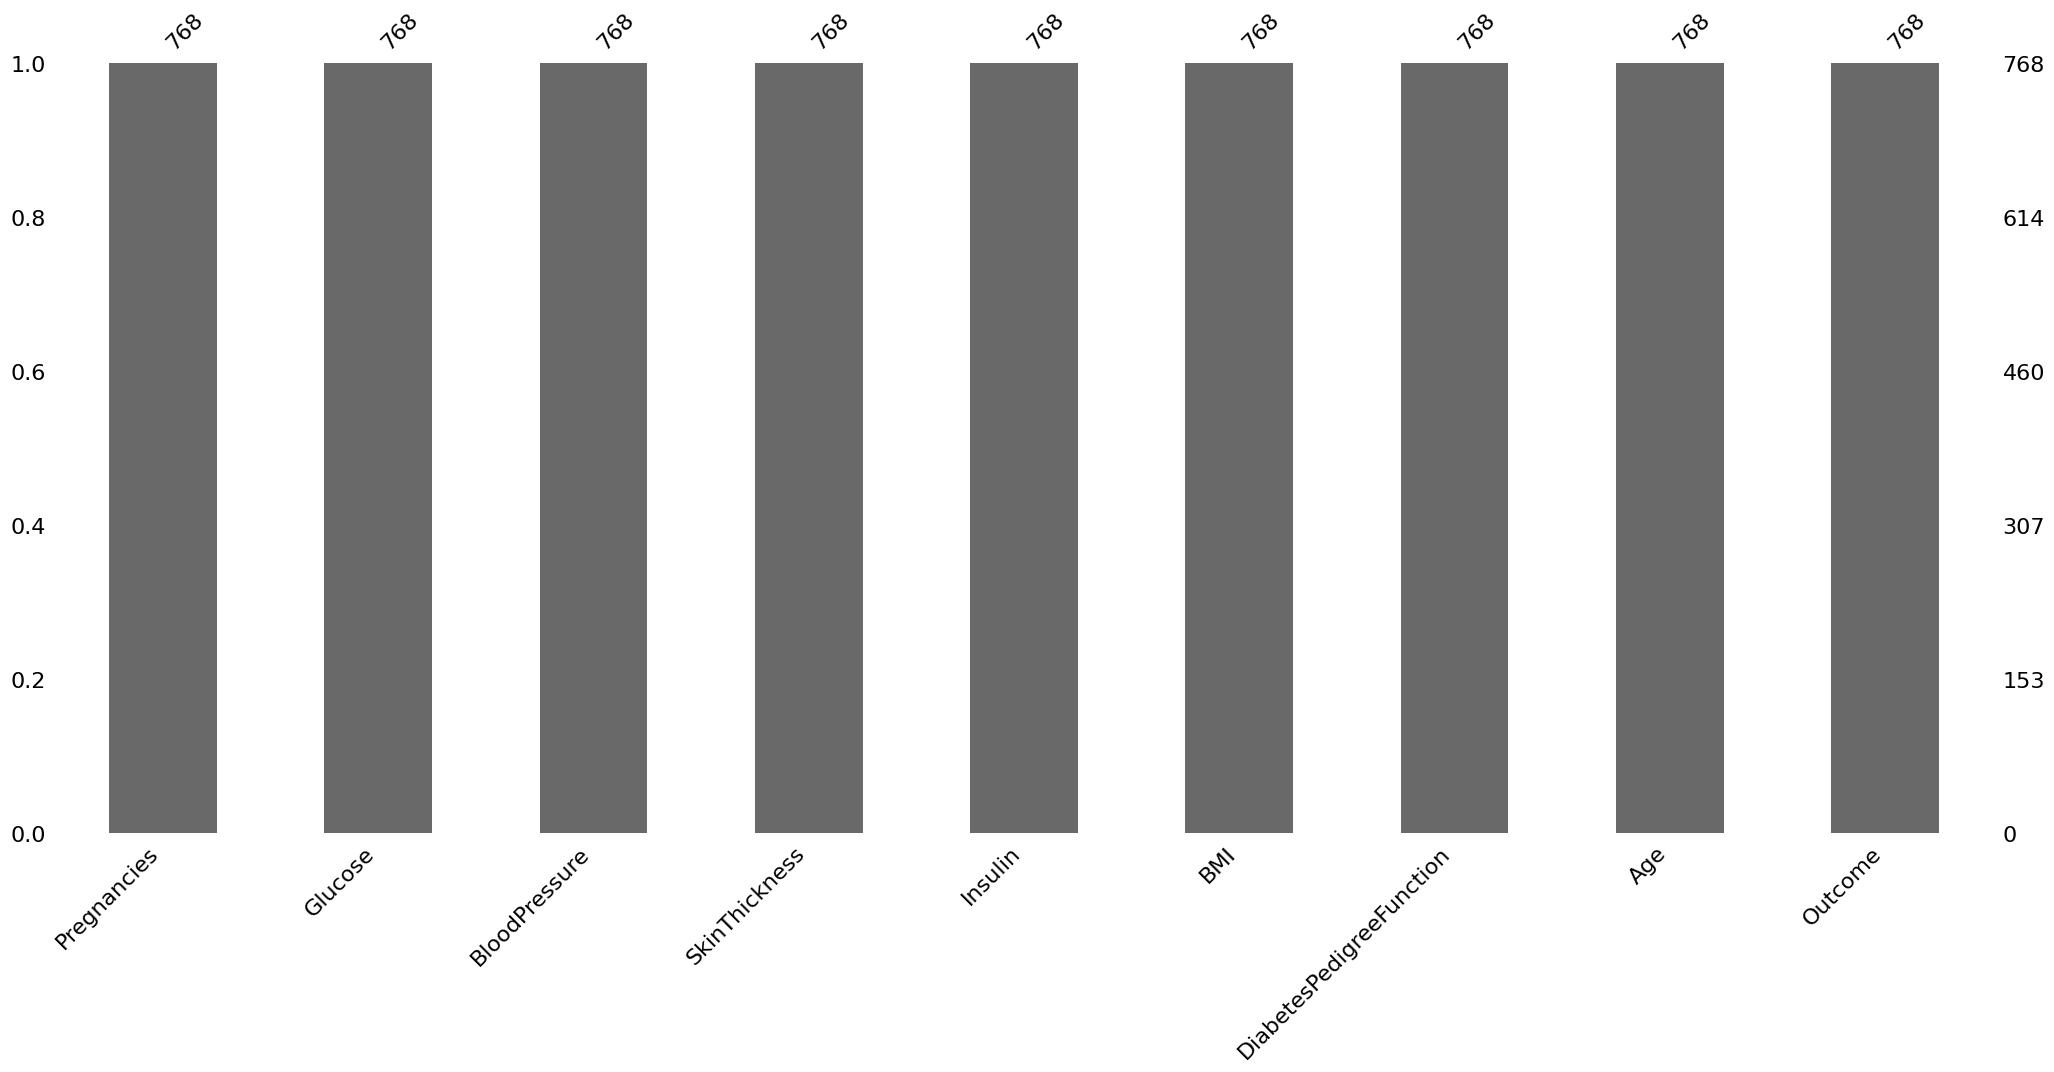

In [23]:
import missingno as msno
p=msno.bar(df_data)

Outcome
0    500
1    268
Name: count, dtype: int64


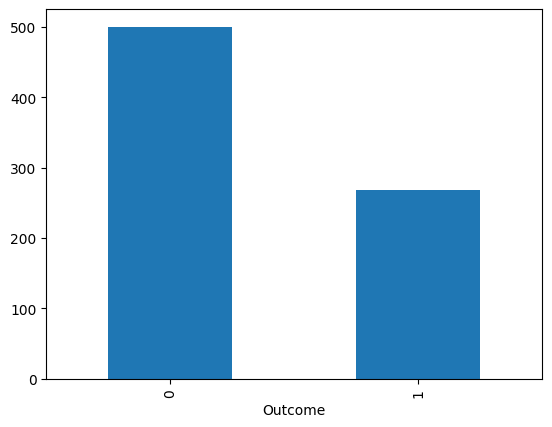

In [24]:
color_wheel={1:'#0392cf',2:'#7bc043'}
colors=df_data["Outcome"].map(lambda x:color_wheel.get(x+1))
print(df_data.Outcome.value_counts())
p=df_data.Outcome.value_counts().plot(kind="bar")

In [25]:
from pandas.plotting import scatter_matrix
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
p=scatter_matrix(df_data,figsize=(20,20))

In [ ]:
p=sns.pairplot(df_copy,hue='Outcome')

# finding correlation


In [ ]:
pyplot.figure(figsize=(12,10))
p=sns.heatmap(df_data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
pyplot.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')

In [ ]:
df_copy.head()

In [29]:
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age'])

In [30]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [31]:
y=df_copy.Outcome
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [34]:
test_scores=[]
train_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [35]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [36]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [38]:
max_train_score=max(train_scores)
train_scores_ind=[i for i,v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k={}'.format(max_train_score*100,list(map(lambda x:x+1,train_scores_ind))))

Max train score 100.0 % and k=[1]


In [40]:
max_test_score=max(test_scores)
test_scores_ind=[i for i,v in enumerate(test_scores) if v==max_test_score]
print('Max test score {} % and k={}'.format(max_test_score*100,list(map(lambda x:x+1,test_scores_ind))))

Max test score 76.5625 % and k=[11]


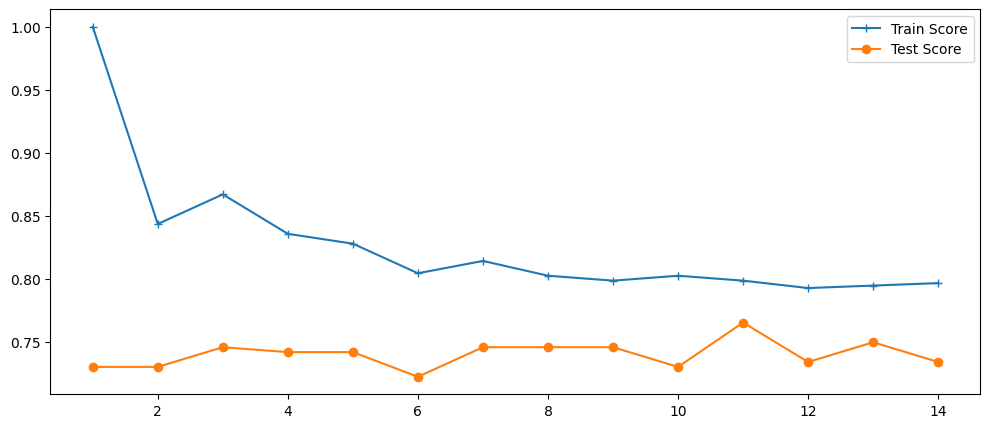

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(range(1,15), train_scores, marker='+', label='Train Score')
plt.plot(range(1,15), test_scores, marker='o', label='Test Score')
plt.legend()
plt.show()

In [46]:
knn=KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [47]:
#confusion matrix

AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

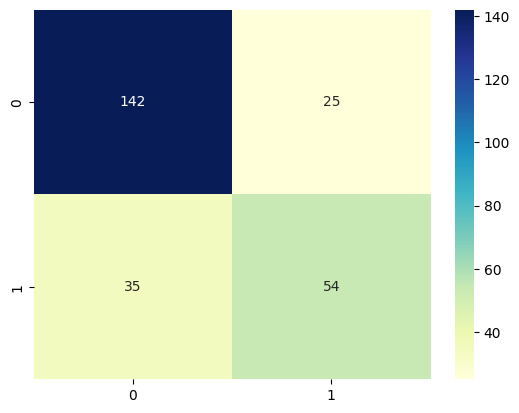

In [48]:
y_pred=knn.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.tilte('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



# ROC-AUC Curve


In [53]:
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

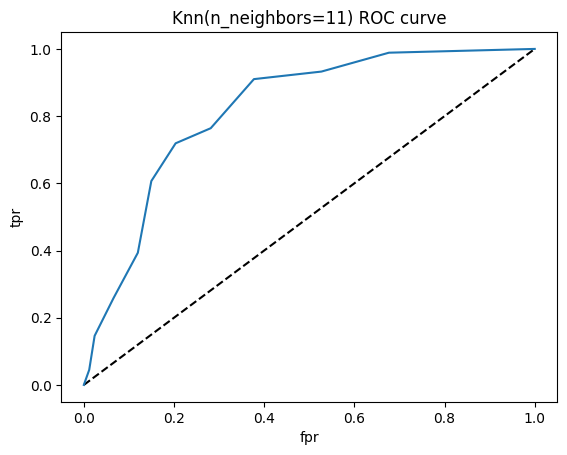

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [56]:
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

In [58]:
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("best Score:"+str(knn_cv.best_score_))
print("Best parameters:"+str(knn_cv.best_params_))

best Score:0.7721840251252015
Best parameters:{'n_neighbors': 25}


# KNN model gives accurate answer

AttributeError: 'function' object has no attribute 'drop'

NameError: name 'df_data' is not defined